# Continuação à classificação

In [1]:
#Vou importar todos os modelos de classificação padrão do sklearn
#import warnings
#warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
import matplotlib.pyplot as plt
from yellowbrick.classifier import  ROCAUC

In [2]:
#Carregar os dados
df = pd.read_csv('titanic3_prep_proce_final.csv', delimiter = ',')

In [3]:
df.head()

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
0,1,1,24.0000,0,0,14.4542,1,0,0,0,1
1,1,1,0.9167,1,2,14.4542,0,1,0,0,1
2,1,1,24.0000,0,0,26.5500,0,1,0,0,1
3,1,1,24.0000,1,0,77.9583,1,0,0,0,1
4,1,1,24.0000,2,0,51.4792,1,0,0,0,1


In [4]:
#Setar o passenger_id como index
#df.set_index('passenger_id',inplace = True)
#df.head()

In [5]:
#Vamos ver se continuam balanceados
df.sobreviveu.value_counts() 

1    500
0    500
Name: sobreviveu, dtype: int64

In [6]:
#Vamos separar a classe da variável
X = df.drop(['sobreviveu'], axis=1)
y = df['sobreviveu']

Não sobreviveu:  500
Sobreviveu :  500


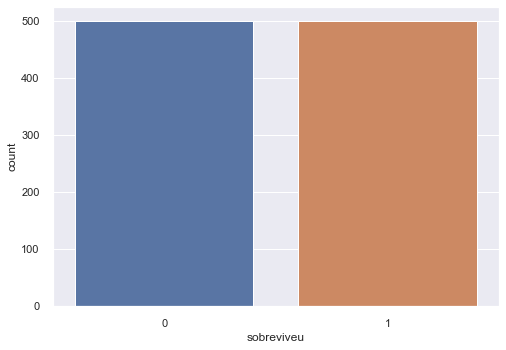

In [7]:
#Rever a distruição das amostras entre as classes
sns.set(style="darkgrid")
ax = sns.countplot(x = y)      
N, S = y.value_counts(sort=True) 
print('Não sobreviveu: ',N)
print('Sobreviveu : ',S)

### Normalização StandardScaler ou Z-Score(Pré-Processamento)

In [8]:
from sklearn.preprocessing import StandardScaler
# create a scaler object
scaler = StandardScaler()
# fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
X

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
0,-1.425645,0.166535,-0.508134,-0.464067,-0.432706,1.170328,-1.170328,-0.534179,-0.335182,0.690728
1,-1.425645,-6.047956,0.528874,1.844725,-0.432706,-0.854461,0.854461,-0.534179,-0.335182,0.690728
2,-1.425645,0.166535,-0.508134,-0.464067,0.029561,-0.854461,0.854461,-0.534179,-0.335182,0.690728
3,-1.425645,0.166535,0.528874,-0.464067,1.994240,1.170328,-1.170328,-0.534179,-0.335182,0.690728
4,-1.425645,0.166535,1.565881,-0.464067,0.982284,1.170328,-1.170328,-0.534179,-0.335182,0.690728
...,...,...,...,...,...,...,...,...,...,...
995,0.907653,0.166535,-0.508134,-0.464067,-0.689877,-0.854461,0.854461,-0.534179,2.983453,-1.447748
996,0.907653,0.166535,0.528874,1.844725,-0.088912,1.170328,-1.170328,-0.534179,-0.335182,0.690728
997,-1.425645,0.166535,0.528874,-0.464067,1.284995,-0.854461,0.854461,1.872032,-0.335182,-1.447748
998,-0.258996,0.166535,0.528874,-0.464067,-0.545607,-0.854461,0.854461,-0.534179,-0.335182,0.690728


In [10]:
#Vamos separar em treino e teste
#Obs: random_state deixa os valores aleatírios dentro de um range
#Eu posso usar 3,5,6, qualquer número inteiro que dentro de um range eu pego um sequencia de valores
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [11]:
print(len(X_treino))
print(len(X_teste))

700
300


## K vizinhos mais próximos
* O algoritmo KNN (K-Nearest Neighbor, ou K Vizinhos Mais Próximos) faz a classificação com base na distância até algumas amostras (k) de treinamento;
* A família de algoritmos é chamada de aprendizado baseado em instâncias (instance-based learning), pois não há parâmetros para aprender;
* O modelo pressupõe que a distância é suficiente para fazer uma inferência; afora isso, nenhuma pressuposição é feita sobre os dados subjacentes ou suas distribuições;
* A parte complicada é selecionar o valor apropriado de k. Além disso, a maldição da dimensionalidade pode atrapalhar as métricas de distância, pois haverá pouca diferença entre os vizinhos mais próximos e mais distantes no caso de mais dimensões.

<img src="KNN.png" width="400px" align="left"><br>

In [12]:
#Vamos importar
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Vamos instanciar
knc = KNeighborsClassifier()

In [14]:
#Treinar
knc.fit(X_treino, y_treino)

KNeighborsClassifier()

In [15]:
knc.score(X_teste, y_teste)

0.73

In [16]:
#A seguir, apresentamos algumas das características que incluiremos em cada modelo:
knc = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                                                metric_params=None, n_jobs=1,n_neighbors=5, p=2, weights='uniform')

In [17]:
knc.fit(X_treino, y_treino)

KNeighborsClassifier(n_jobs=1)

In [18]:
knc.score(X_teste, y_teste)

0.73

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cv_scores = cross_val_score(knc,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.7  0.65 0.71 0.62 0.69 0.66 0.69 0.5  0.52 0.59]
Média dos Scores = 0.633


In [21]:
#Obter a previsões
knc_previsoes = knc.predict(X_teste)
knc_previsoes

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], d

In [22]:
# Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
knc_previsoes_prob = knc.predict_proba(X_teste)
knc_previsoes_prob

array([[0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.6, 0.4],
       [0. ,

### Matriz de Confusão 

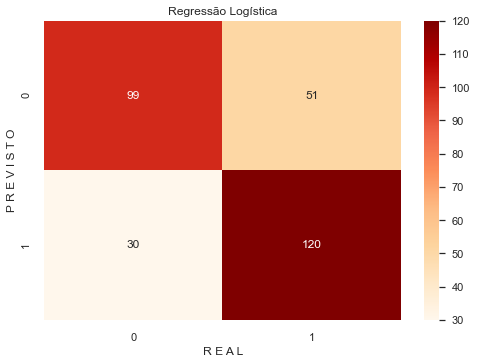

In [23]:
sns.heatmap(confusion_matrix(y_teste, knc_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [24]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,knc_previsoes)
precisao = precision_score(y_teste,knc_previsoes)
recall = recall_score(y_teste,knc_previsoes)
f1Score = f1_score(y_teste,knc_previsoes)
knc_curva_roc = roc_auc_score(y_teste,knc_previsoes)
kappa = cohen_kappa_score(y_teste,knc_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knc_curva_roc,2)}')

Acurácia:0.73
Precisão:0.7
Recall ou Sensibilidade:0.8
F1-Score:0.75
Kappa:0.46
Curva ROC:0.73


In [25]:
print(classification_report(y_teste, knc.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       150
           1       0.70      0.80      0.75       150

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



### Curva ROC 

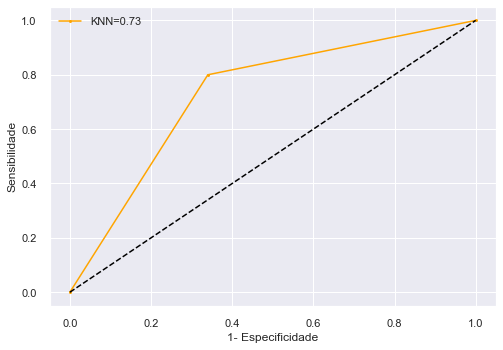

In [26]:
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_previsoes)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN='+str(round(knc_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

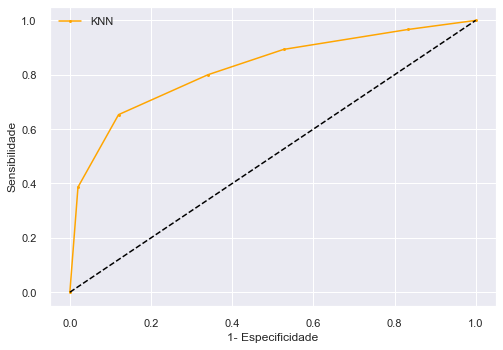

In [27]:
#Aqui estamos pegando apenas da classe 1
knc_probs = knc_previsoes_prob[:,1]
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_probs)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [28]:
X_teste

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_C,embarque_Q,embarque_S
521,-1.425645,0.166535,-0.508134,-0.464067,0.008542,-0.854461,0.854461,-0.534179,-0.335182,0.690728
737,-0.258996,0.166535,-0.508134,-0.464067,-0.583824,-0.854461,0.854461,-0.534179,-0.335182,0.690728
740,-0.258996,0.166535,-0.508134,-0.464067,-0.583824,-0.854461,0.854461,-0.534179,-0.335182,0.690728
660,0.907653,0.166535,0.528874,-0.464067,-0.739081,-0.854461,0.854461,1.872032,-0.335182,-1.447748
411,0.907653,0.166535,-0.508134,-0.464067,1.174004,-0.854461,0.854461,-0.534179,-0.335182,0.690728
...,...,...,...,...,...,...,...,...,...,...
468,0.907653,0.166535,-0.508134,-0.464067,-0.677456,-0.854461,0.854461,-0.534179,-0.335182,0.690728
935,0.907653,0.166535,-0.508134,-0.464067,-0.683349,-0.854461,0.854461,-0.534179,-0.335182,0.690728
428,0.907653,0.166535,-0.508134,-0.464067,-0.683984,1.170328,-1.170328,-0.534179,2.983453,-1.447748
7,-1.425645,0.166535,-0.508134,-0.464067,2.028318,1.170328,-1.170328,-0.534179,-0.335182,0.690728


In [29]:
knc_previsoes_1 = knc.predict(X_teste[:1])
knc_previsoes_1

array([1], dtype=int64)

In [30]:
knc_previsoes_1 = knc.predict_proba(X_teste[:1])
knc_previsoes_1

array([[0.4, 0.6]])

## Decision Tree - Árvore de decisão
Harrison, Matt. Machine Learning – Guia de Referência Rápida (p. 120). Novatec Editora. Edição do Kindle. 

* É como ir a um médico que faz uma série de perguntas a fim de determinar a causa de seus sintomas;
* Podemos usar um processo para criar uma árvore de decisão e ter uma série de perguntas para prever uma classe alvo;
* As vantagens desse modelo incluem suporte para dados não numéricos (em algumas implementações);
* Pouca preparação dos dados (não há necessidade de escalar); 
* Suporte para lidar com relacionamentos não lineares;
* A importância dos atributos é revelada e é fácil de explicar;

Algumas propriedades de uma árvore de decisão:
* Eficiência na execução:
  * Para a criação, percorre cada um dos m atributos e ordena todas as n amostras, O(mn log n); 
  * Para predição, você percorrerá a árvore, O(altura);
* Pré-processamento dos dados:
  * Não é necessário escalar. É preciso se livrar dos valores ausentes e convertê-los em dados numéricos;
* Para evitar uma superadequação: 
  * Defina max_depth com um número menor e aumente min_impurity_decrease;
* Interpretação dos resultados:
  * É possível percorrer a árvore de opções;
  * Por haver passos, uma árvore é ruim para lidar com relacionamentos lineares (uma pequena mudança em um número pode 
    levar a um caminho diferente). 
  * A árvore também é extremamente dependente dos dados de treinamento; 
  * Uma pequena mudança pode modificar a árvore toda.

<img src="arvores_decisao.png" width="400px" align="left"><br>

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
#Importar
from sklearn.naive_bayes import GaussianNB

In [33]:
#Vamos instanciar
#O padrão do max_depth é 0
dt = DecisionTreeClassifier(random_state=42, max_depth=3)

In [34]:
#Treinar
dt.fit(X_treino, y_treino) 

DecisionTreeClassifier(max_depth=3, random_state=42)

In [35]:
dt.score(X_teste, y_teste)

0.7966666666666666

In [36]:
#min_impurity_split=None foi implementado até a versão 0.23.2 
#presort foi descontinuado foi implementado até a versão 0.23.2 
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3, max_features=None, 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                            random_state=42, splitter='best')
#Obs: Não quer dizer que quanto maio  a profundidade (max_depth) você terá um maior desempenho

In [37]:
#Treinar
dt.fit(X_treino, y_treino) 

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
dt.score(X_teste, y_teste)

0.7966666666666666

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [39]:
cv_scores = cross_val_score(dt,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.8  0.79 0.75 0.77 0.85 0.72 0.75 0.69 0.67 0.76]
Média dos Scores = 0.755


In [40]:
#Obter a previsões
dt_previsoes = dt.predict(X_teste)
dt_previsoes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], d

In [41]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
dt_previsoes_prob = dt.predict_proba(X_teste)
dt_previsoes_prob

array([[0.56842105, 0.43157895],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.56842105, 0.43157895],
       [0.30973451, 0.69026549],
       [0.30973451, 0.69026549],
       [0.04794521, 0.95205479],
       [0.30973451, 0.69026549],
       [0.04794521, 0.95205479],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.04794521, 0.95205479],
       [0.78114478, 0.21885522],
       [0.30973451, 0.69026549],
       [0.30973451, 0.69026549],
       [0.78114478, 0.21885522],
       [0.04794521, 0.95205479],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.27777778, 0.72222222],
       [0.04794521, 0.95205479],
       [0.56842105, 0.43157895],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.

### Matriz de Confusão 

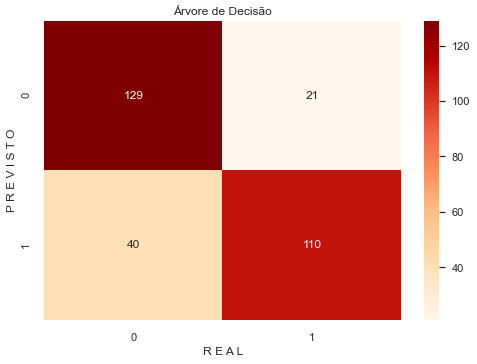

In [42]:
sns.heatmap(confusion_matrix(y_teste, dt_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Árvore de Decisão')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [43]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,dt_previsoes)
precisao = precision_score(y_teste,dt_previsoes)
recall = recall_score(y_teste,dt_previsoes)
f1Score = f1_score(y_teste,dt_previsoes)
dt_curva_roc = roc_auc_score(y_teste,dt_previsoes)
kappa = cohen_kappa_score(y_teste,dt_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(dt_curva_roc,2)}')

Acurácia:0.8
Precisão:0.84
Recall ou Sensibilidade:0.73
F1-Score:0.78
Kappa:0.59
Curva ROC:0.8


In [44]:
print(classification_report(y_teste, dt.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       150
           1       0.84      0.73      0.78       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



### Curva ROC

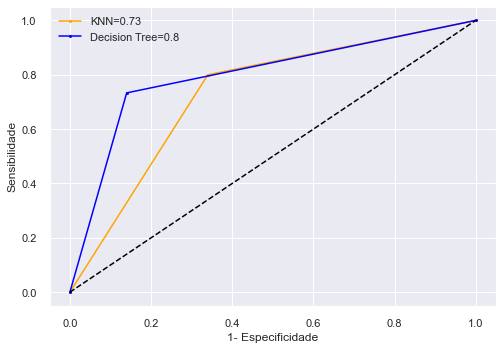

In [45]:
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_previsoes)
dt_fp,dt_vp,lim2 = roc_curve(y_teste,dt_previsoes)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN='+str(round(knc_curva_roc,2)),color="orange")
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree='+str(round(dt_curva_roc,2)),color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

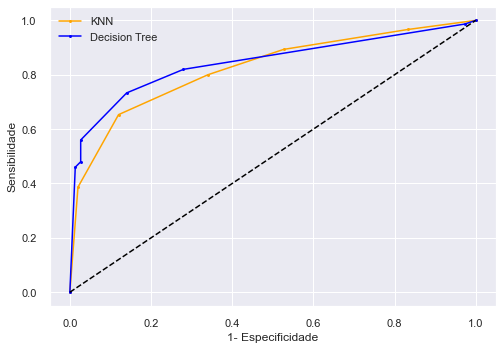

In [46]:
#Aqui estamos pegando apenas da classe 1
knc_probs = knc_previsoes_prob[:,1]
dt_probs = dt_previsoes_prob[:,1]
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_probs)
dt_fp,dt_vp,lim2 = roc_curve(y_teste,dt_probs)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN',color="orange")
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree',color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [47]:
dt_previsoes_1 = dt.predict(X_teste[:1])
dt_previsoes_1

array([0], dtype=int64)

In [48]:
dt_previsoes_1 = dt.predict_proba(X_teste[:1])
dt_previsoes_1

array([[0.56842105, 0.43157895]])

### Referências

### Harrison, Matt. Machine Learning – Guia de Referência Rápida. Novatec Editora. Edição do Kindle. 
### KNeighborsClassifier. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. Acesso em 19/10/2022.
### Decision Tree. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. Acesso em 19/10/2022.
### RandomForestClassifier. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. Acesso em 19/10/2022.